In [1]:
!pip install bs4
from bs4 import BeautifulSoup
import requests
import pandas as pd
import urllib.request
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_html("https://td.police.gov.taipei/News_Content.aspx?n=3A6BEABFA53248B0&sms=0BDD5912D24C83F3&s=4D83EFEEA6430544")
df = df[0]
df

,肇事原因,超速失控,酒後駕車,未依規定讓車,未注意車前狀態,行駛疏忽,違反號誌管制,違反標誌標線,未保持行車間距,肇事逃逸,行人違規,逆向行駛,轉彎不當,搶越行人穿越道,其他,總計
0,110年1-6月發生件數,NaN,NaN,2,4,NaN,5,1.0,1.0,NaN,1.0,NaN,1,15,5,35
1,109年發生件數,3.0,3.0,6,10,2.0,9,1.0,NaN,NaN,6.0,NaN,2,9,9,60
2,108年發生件數,5.0,1.0,4,25,6.0,12,NaN,NaN,NaN,NaN,NaN,11,9,10,83
3,107年發生件數,2.0,2.0,3,14,6.0,7,1.0,2.0,NaN,2.0,NaN,8,14,11,72
4,106年發生件數,NaN,2.0,7,23,4.0,3,2.0,1.0,NaN,NaN,NaN,4,11,4,61
5,105年發生件數,1.0,2.0,8,24,11.0,8,1.0,1.0,NaN,2.0,NaN,9,11,10,88
6,104年發生件數,1.0,1.0,7,19,1.0,8,3.0,2.0,1.0,3.0,1.0,4,12,21,84
7,103年發生件數,NaN,3.0,9,18,6.0,6,5.0,NaN,NaN,3.0,2.0,5,7,19,83
8,102年發生件數,2.0,4.0,9,13,6.0,6,3.0,2.0,1.0,1.0,3.0,5,14,13,82
9,101年發生件數,3.0,8.0,1,21,8.0,5,4.0,2.0,1.0,1.0,2.0,3,9,8,76


In [3]:
df.fillna(0, inplace=True)
df

,肇事原因,超速失控,酒後駕車,未依規定讓車,未注意車前狀態,行駛疏忽,違反號誌管制,違反標誌標線,未保持行車間距,肇事逃逸,行人違規,逆向行駛,轉彎不當,搶越行人穿越道,其他,總計
0,110年1-6月發生件數,0.0,0.0,2,4,0.0,5,1.0,1.0,0.0,1.0,0.0,1,15,5,35
1,109年發生件數,3.0,3.0,6,10,2.0,9,1.0,0.0,0.0,6.0,0.0,2,9,9,60
2,108年發生件數,5.0,1.0,4,25,6.0,12,0.0,0.0,0.0,0.0,0.0,11,9,10,83
3,107年發生件數,2.0,2.0,3,14,6.0,7,1.0,2.0,0.0,2.0,0.0,8,14,11,72
4,106年發生件數,0.0,2.0,7,23,4.0,3,2.0,1.0,0.0,0.0,0.0,4,11,4,61
5,105年發生件數,1.0,2.0,8,24,11.0,8,1.0,1.0,0.0,2.0,0.0,9,11,10,88
6,104年發生件數,1.0,1.0,7,19,1.0,8,3.0,2.0,1.0,3.0,1.0,4,12,21,84
7,103年發生件數,0.0,3.0,9,18,6.0,6,5.0,0.0,0.0,3.0,2.0,5,7,19,83
8,102年發生件數,2.0,4.0,9,13,6.0,6,3.0,2.0,1.0,1.0,3.0,5,14,13,82
9,101年發生件數,3.0,8.0,1,21,8.0,5,4.0,2.0,1.0,1.0,2.0,3,9,8,76


In [4]:
df.drop(labels=range(4,10),axis=0, inplace=True)

In [17]:
df110, df109, df108, df107 = df.loc[0:0, :], df.loc[1:1, :], df.loc[2:2, :], df.loc[3:3, :]

In [18]:
df110.drop(columns='總計', axis=1, inplace=True)
df109.drop(columns='總計', axis=1, inplace=True)
df108.drop(columns='總計', axis=1, inplace=True)
df107.drop(columns='總計', axis=1, inplace=True)

D:\conda\envs\py39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
df110.set_index(['肇事原因'], inplace=True)
df110 = df110.T
df110

肇事原因,110年1-6月發生件數
超速失控,0.0
酒後駕車,0.0
未依規定讓車,2.0
未注意車前狀態,4.0
行駛疏忽,0.0
違反號誌管制,5.0
違反標誌標線,1.0
未保持行車間距,1.0
肇事逃逸,0.0
行人違規,1.0


In [20]:
df109.set_index(['肇事原因'], inplace=True)
df109 = df109.T
df109

肇事原因,109年發生件數
超速失控,3.0
酒後駕車,3.0
未依規定讓車,6.0
未注意車前狀態,10.0
行駛疏忽,2.0
違反號誌管制,9.0
違反標誌標線,1.0
未保持行車間距,0.0
肇事逃逸,0.0
行人違規,6.0


In [21]:
df108.set_index(['肇事原因'], inplace=True)
df108 = df108.T
df108

肇事原因,108年發生件數
超速失控,5.0
酒後駕車,1.0
未依規定讓車,4.0
未注意車前狀態,25.0
行駛疏忽,6.0
違反號誌管制,12.0
違反標誌標線,0.0
未保持行車間距,0.0
肇事逃逸,0.0
行人違規,0.0


In [22]:
df107.set_index(['肇事原因'], inplace=True)
df107 = df107.T
df107

肇事原因,107年發生件數
超速失控,2.0
酒後駕車,2.0
未依規定讓車,3.0
未注意車前狀態,14.0
行駛疏忽,6.0
違反號誌管制,7.0
違反標誌標線,1.0
未保持行車間距,2.0
肇事逃逸,0.0
行人違規,2.0


In [40]:
def draw_chart(data_frame):
    plt.rcParams['figure.figsize'] = [20, 15]
    axes = data_frame.plot(kind='bar')
    plt.title('各種類車禍統計圖',fontsize=40)
    plt.xlabel('類別',fontsize=40)
    plt.ylabel('數量',fontsize=40)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(fontsize=20)
    plt.show()

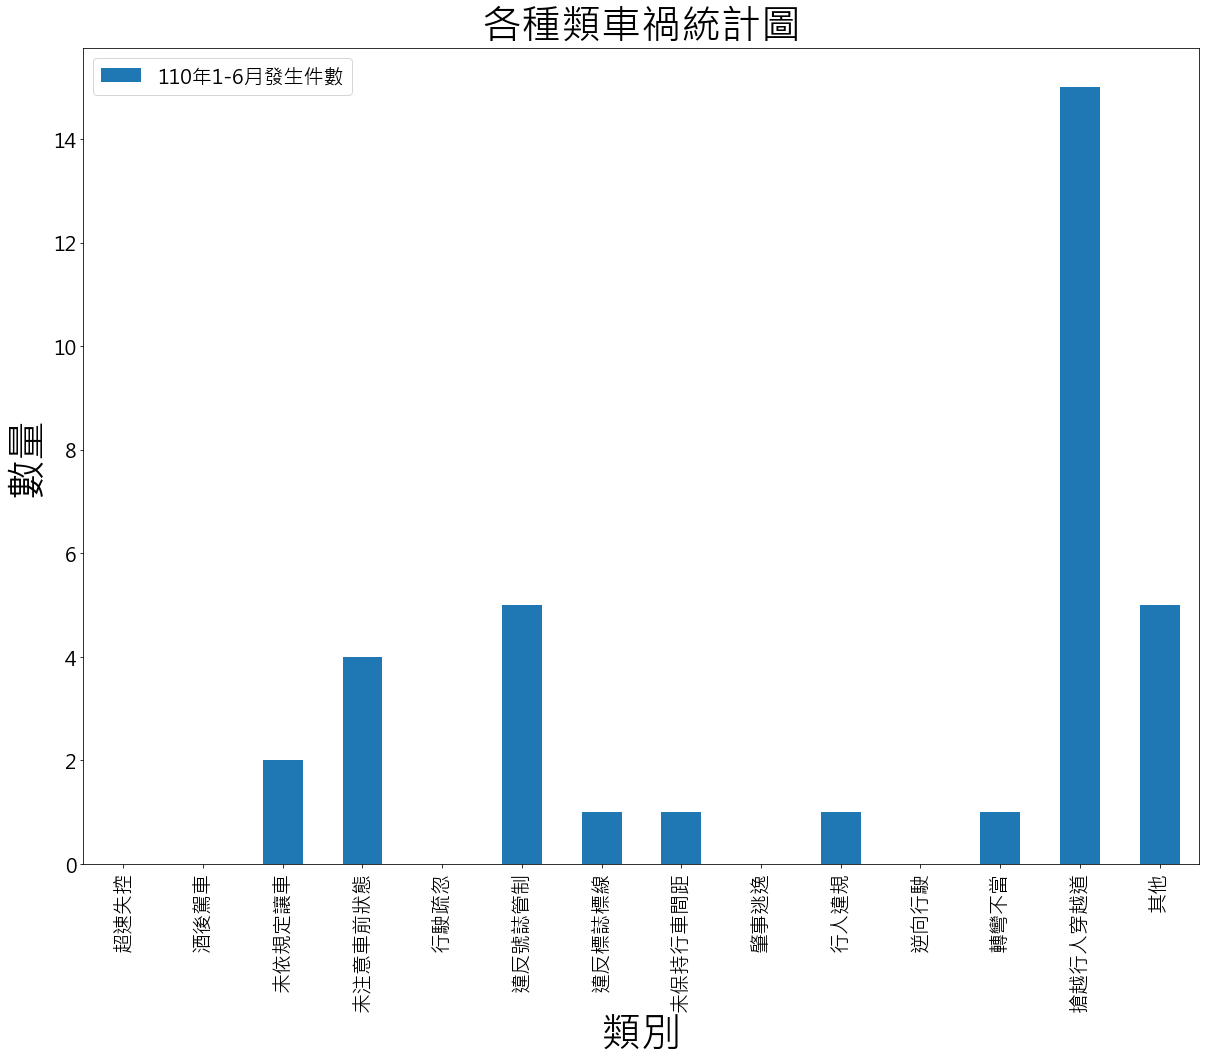

In [41]:
draw_chart(df110)

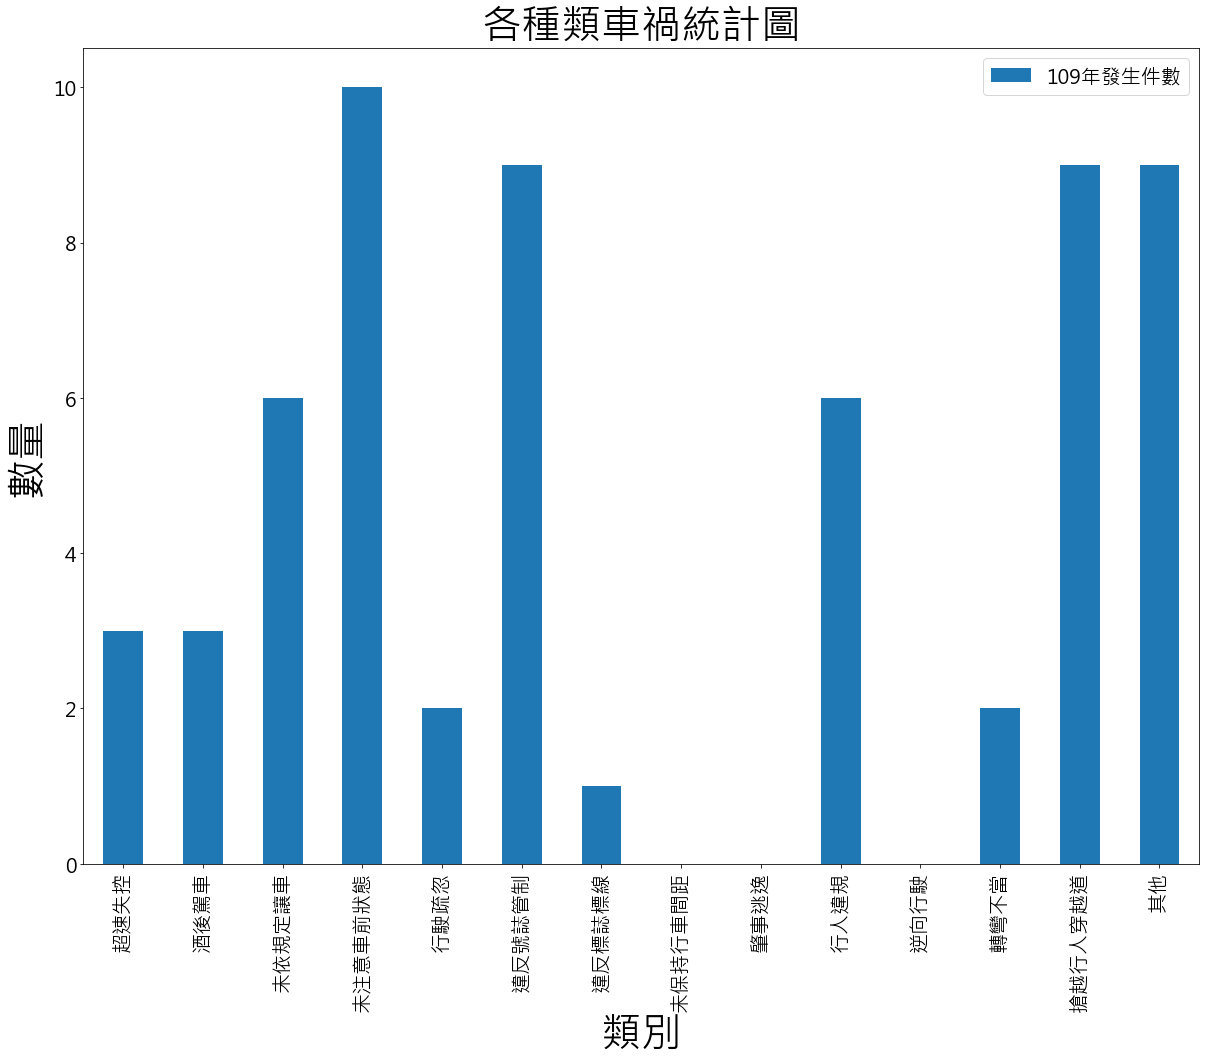

In [42]:
draw_chart(df109)

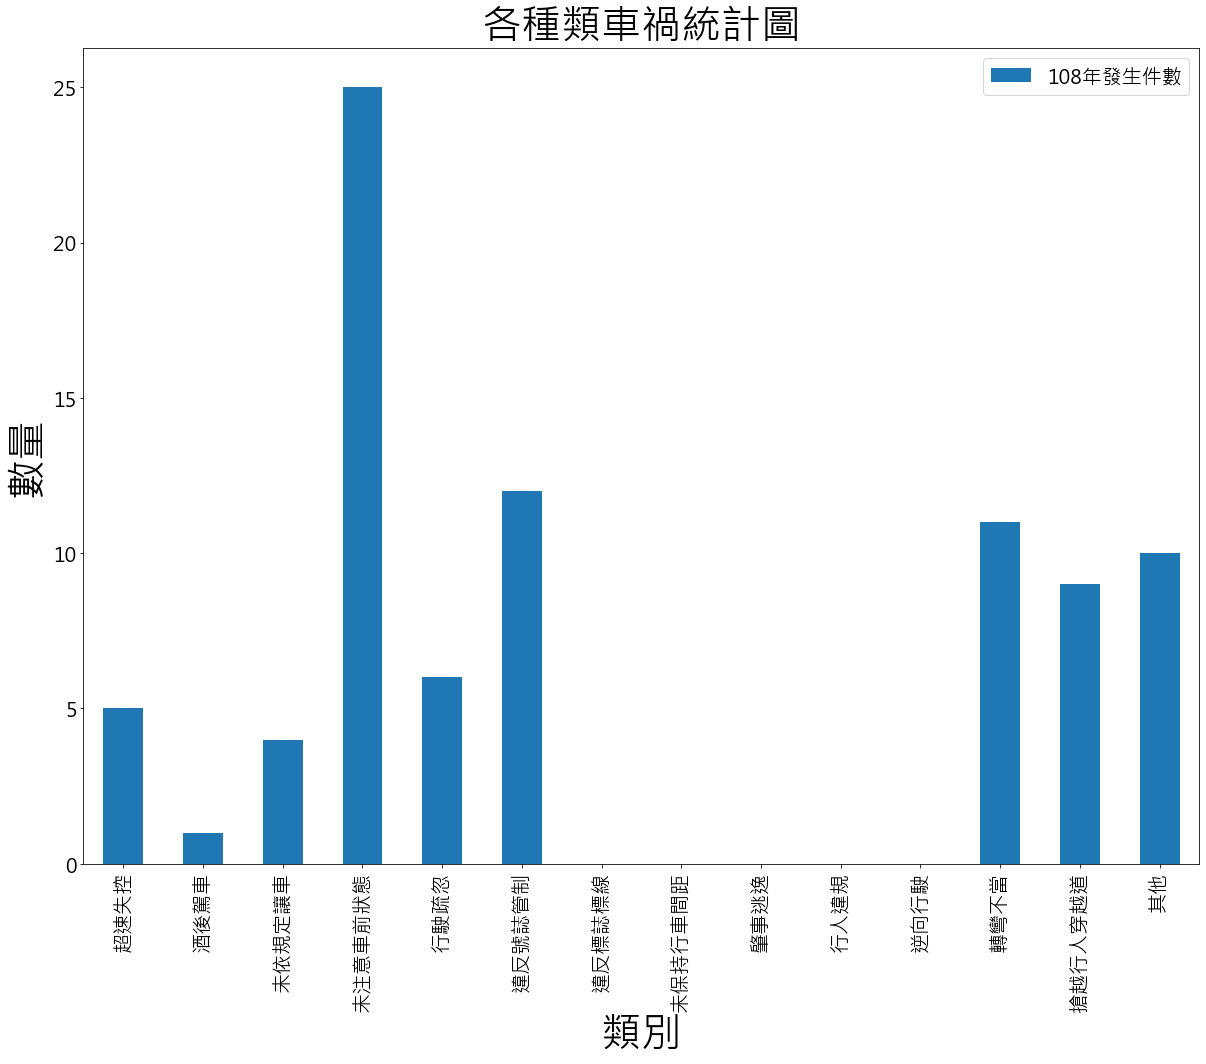

In [43]:
draw_chart(df108)

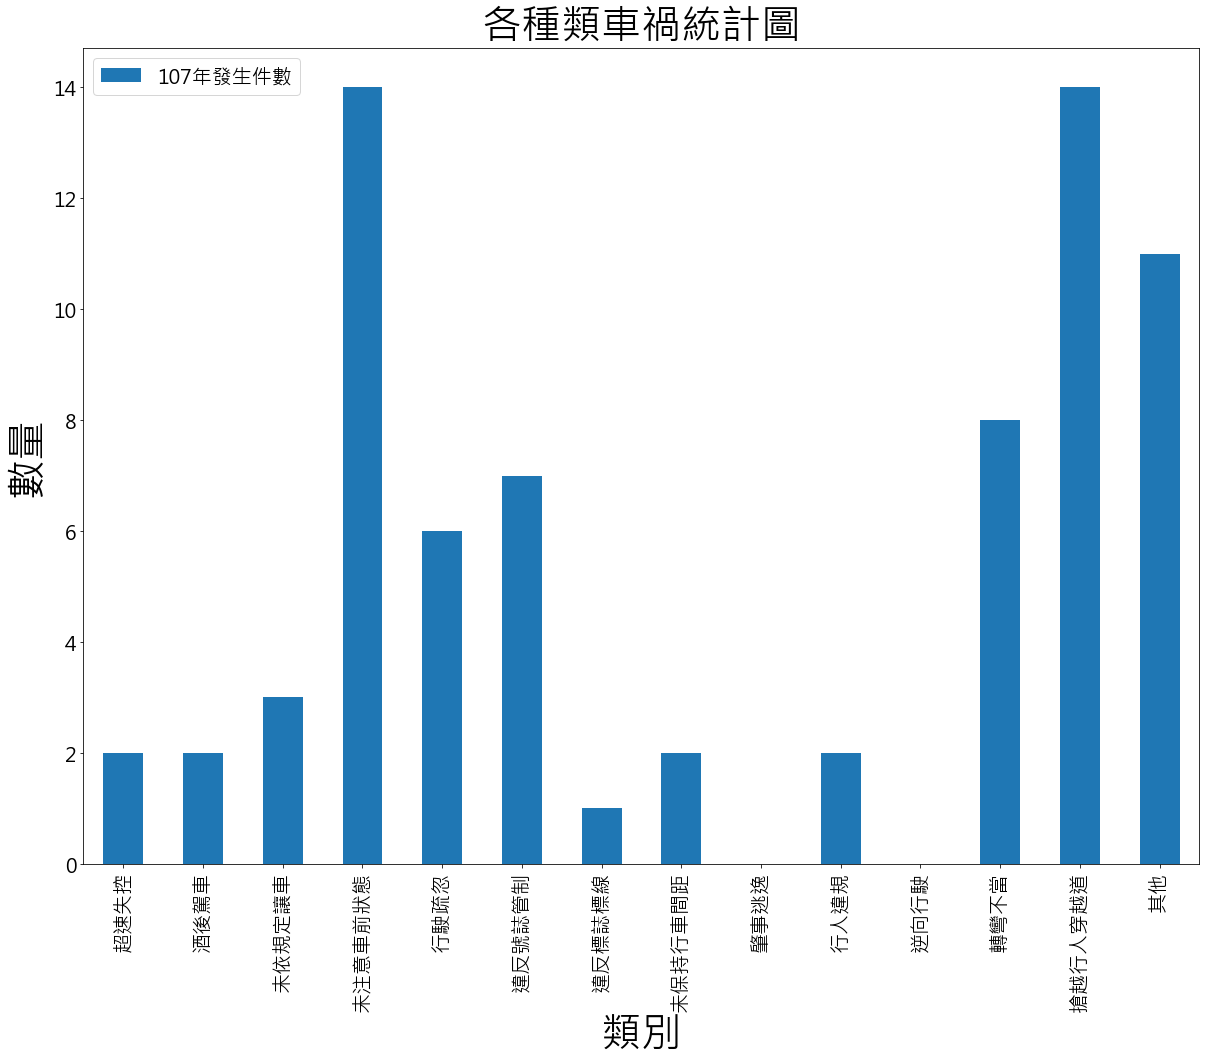

In [44]:
draw_chart(df107)